MC采样比较经典的是接受-拒绝采样和重要采样，下面直接切入正题....   

### 一.接受-拒绝采样

接受-拒绝采样是这样回事，假如某$p(x)$是我们需要采样的分布，然后我们采一个点$x^*$，如果$p(x^*)$比较大，那么它被留下的可能就比较大，如果$p(x^*)$比较小，那么它被留下的可能也比较小，这样经过采样得到一系列的点，其中每个点是否保留的概率与该点的$p(x)$正比的话，那么采样点的经验分布就近似于$p(x)$的分布了，然后这里就产生了两个小问题：   

（1）如何采样？   

（2）$p(x^*)$都是相对大小，如何量化决定去留？  

为了解决上面的问题，我们可以引入一个容易采样的分布$q(x)$，让它作为$p(x)$的参考，接下来的做法是：    

>（1）首先，让$q(x)$的概率分布去盖住$p(x)$，即对于任意的$x$都有$q(x)>p(x)$，但是这是不可能的，因为$p(x),q(x)$同为概率分布，必然有$\int_xp(x)=\int_xq(x)=1$，所以如果某个地方有$q(x)>p(x)$，那么必然在其他的地方有$q(x)<p(x)$，所以我们可以对$q(x)$扩大一定的倍数$c>1$使其满足对任意$x$都有$cq(x)>p(x)$，如下图所示，这样我们就解决了上面的第一个问题：如何采样？我们可以按照$q(x)$分布去采样，假如就得到了图中样本点$x^*$，那么接下来就是确定样本去留的问题了
![avatar](./source/12_接受拒绝采样demo.png)   

>（2）$x^*$的去留，可以按照它对应的$\frac{p(x^*)}{cq(x^*)}$来决定，具体可以这样操作，从$U(0,1)$中均匀采样一个$u$，如果$u\leq \frac{p(x^*)}{cq(x^*)}$则保留，否则去掉；



所以，按照上面的（1）（2）步，样本$x^*$被采样的概率如下，其中，$q(x^*)$表示第一步被采样的概率，$\frac{p(x^*)}{cq(x^*)}$表示第二步被保留的概率，而它们的乘积正比于我们的目标分布概率$p(x^*)$：   

$$
q(x^*)\cdot\frac{p(x^*)}{cq(x^*)}=\frac{p(x^*)}{c}\propto p(x^*) 
$$   

#### 效率分析

接受-拒绝采样的实操其实比较麻烦，因为$q(x)$很难找，如果找的不合适，可能会导致接受率很低，如下图，绿色线是$p(x)$，红色线是$cq(x)$，虽然它能盖住$p(x)$，但左侧采样的接受率会很低，导致要采很多次可能才会有一个样本会被接受
![avatar](./source/12_接受拒绝采样率低demo.png)   

#### 补充
当然，也有些特殊情况，比如对于$logp(x)$为凹函数的分布，可以通过一些算法作高效的采样，比如将某点$x^*$的$q(x^*)$设置为$p(x)$在点$x^*$处的切线， [参考>>>](https://www.bilibili.com/video/BV1Qx411W7mf?p=15)

### 二.重要采样
重要采样可以看作对接受-拒绝采样的简化，它的思想是对所有采样得到的样本都接受，但是要对它赋予一个权重，简单来说就这么回事：    

（1）选择一个容易抽样的分布$q(x)$，从中抽样$x^*$；     

（2）设置该样本对应的权重为$\frac{p(x^*)}{q(x^*)}$，称为**重要权重**，over...   

而且，显然抽样概率与目标概率一样：   


$$
q(x^*)\frac{p(x^*)}{q(x^*)}=p(x^*)
$$   


#### 求期望

这样理解起来可能有些抽象，我们看看它在求期望中如何应用来直观理解一下，其实说来也很简单，套路和上一节求积分的例子很像，就是往一个已知分布的期望函数求解中再塞一个分布进去：   

$$
E_{x\sim p(x)}[f(x)]=\int_xp(x)f(x)dx\\
=\int_xf(x)\frac{p(x)}{q(x)}q(x)dx\\
=\int_x[f(x)\frac{p(x)}{q(x)}]q(x)dx\\
=E_{x\sim q(x)}[f(x)\frac{p(x)}{q(x)}]
$$   

#### 效率分析
重要采样的难点同样在于寻找一个合适$q(x)$，如下图，绿色的线是我们的目标分布$p(x)$，$q(x)$是我们采样分布，如果采样点不够的话很有可能产生较大的偏差，比如下图中采样点很有可能会分布在左侧，所以意味着我们同样需要采很多样本才有可能对目标分布做一个不错的拟合
![avatar](./source/12_重要采样效率分析demo.png)

### 三.案例
为了添加一个案例演示，我憋了一个看起来很复杂的概率密度函数（我也不知道自己为什么这么优秀~~~ ），如下：  

$$
p(x)=\frac{1}{1179}[(x-2)^2+(x-5)^3+100cos(x)+106],0<x<10
$$  
看看它的分布

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

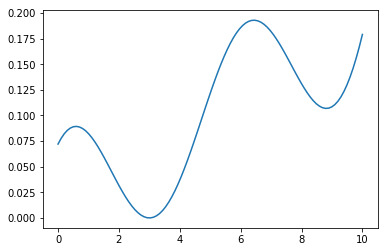

In [2]:
def func(x):
    return ((x-2)*(x-2)+(x-5)*(x-5)*(x-5)+100*np.cos(x)+106)/1179
x=np.linspace(0,10,100)
plt.plot(x,func(x))

接下来，用接收拒绝采样来采样一系列样本看看效果，显然，我们可以取：   

$$
q(x)=0.1,0<x<10\\
c=2
$$

In [3]:
#采样的样本量
nums=10000
count=0
points=[]
while count<nums:
    #首先按照q(x)，随机均匀采样一个样本点
    point=np.random.random()*10
    #计算p(x)/(c*q(x))
    p=func(point)/0.2
    #从(0,1)均匀采样一个u
    u=np.random.random()
    #判断是否保留（即对应了上面的那条线）
    if u<p:
        points.append(point)
        count+=1

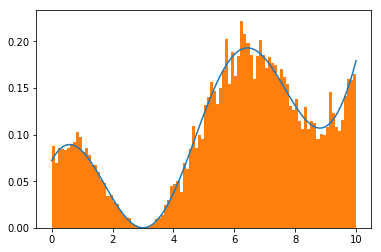

In [4]:
#看看效果
plt.plot(x,func(x))
plt.hist(points,normed=True,bins=100)
plt.show()

### 四.分析
上面的两种方法的难点主要在于难以找到合适的$q(x)$，如果$q(x)$不合适，就要采样很多的点，从而导致效率低下，那如果能找到一个方法让我们采样样本不用丢弃或者调整权重就能自然的逼近我们的目标分布就好了，这样的方法是存在的！！！，那就是马尔科夫蒙特卡洛法（**MCMC**），大家先倒回去看看[《12_05_PGM_马尔科夫链_初探及代码实现》](https://nbviewer.jupyter.org/github/zhulei227/ML_Notes/blob/master/notebooks/12_05_PGM_%E9%A9%AC%E5%B0%94%E7%A7%91%E5%A4%AB%E9%93%BE_%E5%88%9D%E6%8E%A2%E5%8F%8A%E4%BB%A3%E7%A0%81%E5%AE%9E%E7%8E%B0.ipynb)这一节看看有没有什么想法，哈哈哈哈~~~